In [1]:
import pandas as pd
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
from collections import Counter
from datetime import datetime, timedelta

In [7]:
#Code Name extraction: https://gist.github.com/onyxfish/322906

In [2]:
df = pd.read_csv('trumptweets_sent.csv')

In [4]:
#only Negative ones
df = df[df['compound']< -0.2]

In [6]:
def name_extraction(sample):
    sentences = nltk.sent_tokenize(sample)
    tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
    chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)

    def extract_entity_names(t):
        entity_names = []

        if hasattr(t, 'label') and t.label:
            if t.label() == 'NE':
                entity_names.append(' '.join([child[0] for child in t]))
            else:
                for child in t:
                    entity_names.extend(extract_entity_names(child))

        return entity_names

    entity_names = []
    for tree in chunked_sentences:
        entity_names.extend(extract_entity_names(tree))

    dict_ = set(entity_names)
    
    return list(dict_)

## Attacks overall

In [9]:
df['names'] = df['headline'].apply(name_extraction)
l = list(df['names'])
flat_list = [item for sublist in l for item in sublist]

/Users/barneyjs/.virtualenvs/trump/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Counter({'Obama': 491,
         'realDonaldTrump': 316,
         'U.S.': 246,
         'BarackObama': 215,
         'Android': 207,
         'China': 199,
         'Trump': 195,
         'America': 146,
         'Fake News': 141,
         'ObamaCare': 139,
         'American': 137,
         'Clinton': 118,
         'Russia': 116,
         'Iran': 114,
         'Donald Trump': 113,
         'Congress': 96,
         'FBI': 96,
         'Mexico': 88,
         'Iraq': 82,
         'ISIS': 81,
         'Fake News Media': 79,
         'CNN': 78,
         'Via': 73,
         'Crooked': 68,
         'US': 68,
         'United States': 66,
         'White House': 61,
         'Witch Hunt': 56,
         'Hillary': 56,
         'Crooked Hillary': 55,
         'Border': 54,
         'FoxNews': 54,
         'Syria': 53,
         'Russian': 52,
         'Southern Border': 50,
         'Hillary Clinton': 50,
         'Sad': 48,
         'FAKE': 46,
         'Dems': 43,
         'Washington': 43,
    

In [10]:
Counter(sorted(flat_list, key=Counter(flat_list).get, reverse=True))

Counter({'Obama': 491,
         'realDonaldTrump': 316,
         'U.S.': 246,
         'BarackObama': 215,
         'Android': 207,
         'China': 199,
         'Trump': 195,
         'America': 146,
         'Fake News': 141,
         'ObamaCare': 139,
         'American': 137,
         'Clinton': 118,
         'Russia': 116,
         'Iran': 114,
         'Donald Trump': 113,
         'Congress': 96,
         'FBI': 96,
         'Mexico': 88,
         'Iraq': 82,
         'ISIS': 81,
         'Fake News Media': 79,
         'CNN': 78,
         'Via': 73,
         'Crooked': 68,
         'US': 68,
         'United States': 66,
         'White House': 61,
         'Witch Hunt': 56,
         'Hillary': 56,
         'Crooked Hillary': 55,
         'Border': 54,
         'FoxNews': 54,
         'Syria': 53,
         'Russian': 52,
         'Southern Border': 50,
         'Hillary Clinton': 50,
         'Sad': 48,
         'FAKE': 46,
         'Dems': 43,
         'Washington': 43,
    

## Attacks during presidency

In [13]:
all_ = pd.read_csv('trumptweets.csv')
df_ps = all_.merge(df, left_on='text', right_on='headline')
df_ps['time'] = pd.to_datetime(df_ps['created_at'], format='%m-%d-%Y %H:%M:%S')
df_ps.index = df_ps['time']

In [21]:
pres = df_ps["2016":"2019"]
l = list(pres['names'])
flat_list = [item for sublist in l for item in sublist]
Counter(sorted(flat_list, key=Counter(flat_list).get, reverse=True))

Counter({'U.S.': 143,
         'Fake News': 141,
         'Trump': 102,
         'Clinton': 100,
         'FBI': 97,
         'Russia': 93,
         'American': 85,
         'Fake News Media': 81,
         'Obama': 77,
         'Congress': 68,
         'Crooked': 68,
         'CNN': 63,
         'Mexico': 63,
         'United States': 56,
         'Witch Hunt': 56,
         'Crooked Hillary': 56,
         'China': 55,
         'Border': 54,
         'America': 51,
         'Southern Border': 49,
         'Russian': 48,
         'FAKE': 46,
         'ISIS': 43,
         'Hillary Clinton': 42,
         'White House': 41,
         'Iran': 41,
         'Dems': 40,
         'Hillary': 39,
         'DNC': 38,
         'North Korea': 37,
         'Mueller Report': 34,
         'Crooked Hillary Clinton': 33,
         'ObamaCare': 33,
         'Mueller': 32,
         'Sad': 31,
         'Ted Cruz': 30,
         'Florida': 27,
         'Bernie Sanders': 27,
         'California': 26,
         'U

### People
Top 20 people Trump has attacked over the past 8 years.

In [ ]:
#1 Obama, Barack
#2 Clinton, Hillary
#3 Mueller, Robert (Bob)
#4 Cruz, Ted
#5 Sanders, Bernie
#6 Comey, James
#7 Pelosi, Nancy
#8 Cohen, Michael
#9 Sessions, Jeff
#10 Rubio, Marco
#11 McCabe, Andrew
#12 Warren, Elizabet (Pocahontas)
#13 Brennan, John
#14 Romney, Mitt
#15 Page, Lisa
#16 Schumer, Chuck
#17 Cummings, Elijah
#18 Kerry, John
#20 Bush, Jeb
#21 Biden, Joe

In [30]:
def Top20People(text):
    text = text.lower()
    if ("obama" or "barack") in text:
        return "Barack Obama"
    if ("clinton" or "hillary") in text:
        return "Hillary Clinton"
    if ("mueller" or "robert" or "bob ") in text:
        return "Robert Mueller"
    if ("cruz" or "ted ") in text:
        return "Ted Cruz"
    if ("bernie" or "sanders") in text:
        return "Bernie Sanders"
    if ("james" or "comey") in text:
        return "James Comey"
    if ("nancy" or "pelosi") in text:
        return "Nancy Pelosi"
    if ("michael" or "cohen") in text:
        return "Michael Cohen"
    if ("jeff" or "sessions") in text:
        return "Jeff Sessions"
    if ("marco" or "rubio") in text:
        return "Marco Rubio"
    if ("andrew" or "mccabe") in text:
        return "Andrew McCabe"
    if ("warren" or "elizabetn" or "pocahontas") in text:
        return "Elizabeth Warren"
    if ("john" or "brennan") in text:
        return "John Brennan"
    if ("mitt" or "romney") in text:
        return "Mitt Romney"
    if ("lisa" or "page") in text:
        return "Lisa Page"
    if ("chuck" or "schumer") in text:
        return "Chuck Schumer"
    if ("elijah" or "cummings") in text:
        return "Elijah Cummings"
    if ("john" or "kerry") in text:
        return "John Kerry"
    if ("jeb " or "bush") in text:
        return "Jeb Bush"
    if ("joe " or "biden") in text:
        return "Joe Biden"
    else:
        return "N/A"

In [32]:
df_ps['Top Attacked'] = df_ps['text'].apply(Top20People)

In [123]:
pd.DataFrame(df_ps['Top Attacked'].value_counts())

,Top Attacked
N/A,5525
Barack Obama,1099
Hillary Clinton,249
Mitt Romney,124
Robert Mueller,113
John Brennan,105
Ted Cruz,99
James Comey,62
Jeb Bush,49
Michael Cohen,49


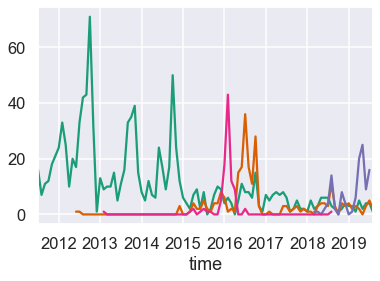

In [130]:
df_ps[df_ps['Top Attacked']=="Barack Obama"].resample('M')['headline'].count().plot()
df_ps[df_ps['Top Attacked']=="Hillary Clinton"].resample('M')['headline'].count().plot()
#df_ps[df_ps['Top Attacked']=="Mitt Romney"].resample('M')['headline'].count().plot()
df_ps[df_ps['Top Attacked']=="Robert Mueller"].resample('M')['headline'].count().plot()
#df_ps[df_ps['Top Attacked']=="John Brennan"].resample('M')['headline'].count().plot()
df_ps[df_ps['Top Attacked']=="Ted Cruz"].resample('M')['headline'].count().plot()
#df_ps[df_ps['Top Attacked']=="James Comey"].resample('M')['headline'].count().plot()
#df_ps[df_ps['Top Attacked']=="Michael Cohen"].resample('M')['headline'].count().plot()
#df_ps[df_ps['Top Attacked']=="Bernie Sanders"].resample('M')['headline'].count().plot()#
#df_ps[df_ps['Top Attacked']=="Jeb Bush"].resample('M')['headline'].count().plot()

In [135]:
pd.DataFrame(df_ps[df_ps['Top Attacked']=="Ted Cruz"].resample('M')['headline'].count())

,headline
time,
2013-02-28,1
2013-03-31,0
2013-04-30,0
2013-05-31,0
2013-06-30,0
2013-07-31,0
2013-08-31,0
2013-09-30,0
2013-10-31,0


In [83]:
pd.set_option('max_colwidth', 280)
pd.set_option("display.max_rows", 1000)

In [84]:
obama = df_ps[df_ps['Top Attacked']=="Barack Obama"].sort_index()
obama['favorite_count'] = obama['favorite_count'].astype(int)
obama['retweet_count'] = obama['retweet_count'].astype(int)

In [119]:
clinton = df_ps[df_ps['Top Attacked']=="Hillary Clinton"].sort_index()
clinton['favorite_count'] = clinton['favorite_count'].astype(int)
clinton['retweet_count'] = clinton['retweet_count'].astype(int)

In [124]:
mueller = df_ps[df_ps['Top Attacked']=="Robert Mueller"].sort_index()
mueller['favorite_count'] = mueller['favorite_count'].astype(int)
mueller['retweet_count'] = mueller['retweet_count'].astype(int)

In [125]:
mueller.sort_values(by='favorite_count', ascending=False)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,Unnamed: 0,neg,neu,pos,compound,headline,names,time,Top Attacked
time,,,,,,,,,,,,,,,,
2019-04-18 21:31:51,Twitter for iPhone,“Donald Trump was being framed he fought back. That is not Obstruction.” @JesseBWatters I had the right to end the whole Witch Hunt if I wanted. I could have fired everyone including Mueller if I wanted. I chose not to. I had the RIGHT to use Executive Privilege. I didn’t!,04-18-2019 21:31:51,35112,139309,false,1.118991e+18,2209,0.173,0.777,0.050,-0.7345,“Donald Trump was being framed he fought back. That is not Obstruction.” @JesseBWatters I had the right to end the whole Witch Hunt if I wanted. I could have fired everyone including Mueller if I wanted. I chose not to. I had the RIGHT to use Executive Privilege. I didn’t!,"[Mueller, Donald Trump, Executive Privilege, RIGHT]",2019-04-18 21:31:51,Robert Mueller
2019-03-27 01:27:21,Twitter for iPhone,The Fake News Media has lost tremendous credibility with its corrupt coverage of the illegal Democrat Witch Hunt of your all time favorite duly elected President me! T.V. ratings of CNN &amp; MSNBC tanked last night after seeing the Mueller Report statement. @FoxNews up BIG!,03-27-2019 01:27:21,33035,137650,false,1.110715e+18,961,0.219,0.726,0.054,-0.8436,The Fake News Media has lost tremendous credibility with its corrupt coverage of the illegal Democrat Witch Hunt of your all time favorite duly elected President me! T.V. ratings of CNN &amp; MSNBC tanked last night after seeing the Mueller Report statement. @FoxNews up BIG!,"[Mueller Report, CNN, Fake News Media, MSNBC, FoxNews]",2019-03-27 01:27:21,Robert Mueller
2019-04-07 13:50:02,Twitter for iPhone,Looks like Bob Mueller’s team of 13 Trump Haters &amp; Angry Democrats are illegally leaking information to the press while the Fake News Media make up their own stories with or without sources - sources no longer matter to our corrupt &amp; dishonest Mainstream Media they ar...,04-07-2019 13:50:02,35152,135550,false,1.114888e+18,1018,0.225,0.647,0.128,-0.8361,Looks like Bob Mueller’s team of 13 Trump Haters &amp; Angry Democrats are illegally leaking information to the press while the Fake News Media make up their own stories with or without sources - sources no longer matter to our corrupt &amp; dishonest Mainstream Media they ar...,"[Bob Mueller, Fake News Media, Angry Democrats]",2019-04-07 13:50:02,Robert Mueller
2019-03-28 11:04:04,Twitter for iPhone,Wow ratings for “Morning Joe” which were really bad in the first place just “tanked” with the release of the Mueller Report. Likewise other shows on MSNBC and CNN have gone down by as much as 50%. Just shows Fake News never wins!,03-28-2019 11:04:04,30828,134254,false,1.111222e+18,2036,0.192,0.736,0.072,-0.7494,Wow ratings for “Morning Joe” which were really bad in the first place just “tanked” with the release of the Mueller Report. Likewise other shows on MSNBC and CNN have gone down by as much as 50%. Just shows Fake News never wins!,"[Mueller Report, CNN, MSNBC, News, Wow]",2019-03-28 11:04:04,Robert Mueller
2018-11-18 18:01:09,Twitter for iPhone,So funny to see little Adam Schitt (D-CA) talking about the fact that Acting Attorney General Matt Whitaker was not approved by the Senate but not mentioning the fact that Bob Mueller (who is highly conflicted) was not approved by the Senate!,11-18-2018 18:01:09,36809,133250,false,1.064217e+18,5650,0.108,0.847,0.046,-0.4328,So funny to see little Adam Schitt (D-CA) talking about the fact that Acting Attorney General Matt Whitaker was not approved by the Senate but not mentioning the fact that Bob Mueller (who is highly conflicted) was not approved by the Senate!,"[Bob Mueller, Senate, Adam Schitt]",2018-11-18 18:01:09,Robert Mueller
2019-02-17 23:45:13,Twitter for iPhone,The Mueller investigation is totally conflicted illegal and rigged! Should never have been allowed to begin except for the Collusion and many crimes committed by the Democrat

In [115]:
df_ps['favorite_count'] = df_ps['favorite_count'].astype(int)
df_ps['retweet_count'] = df_ps['retweet_count'].astype(int)

In [118]:
df_ps.sort_values(by='favorite_count', ascending=False)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,Unnamed: 0,neg,neu,pos,compound,headline,names,time,Top Attacked
time,,,,,,,,,,,,,,,,
2019-08-02 17:41:30,Twitter for iPhone,A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week get home ASAP A$AP!,08-02-2019 17:41:30,252886,880133,false,1.157346e+18,7727,0.127,0.775,0.099,-0.2003,A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week get home ASAP A$AP!,"[ASAP, AP, Sweden, AP Rocky, United States]",2019-08-02 17:41:30,N/A
2016-12-31 13:17:21,Twitter for Android,Happy New Year to all including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!,12-31-2016 13:17:21,141853,350860,false,8.151851e+17,5024,0.288,0.524,0.188,-0.4911,Happy New Year to all including to my many enemies and those who have fought me and lost so badly they just don't know what to do. Love!,"[Love, Happy New Year]",2016-12-31 13:17:21,N/A
2019-07-25 21:24:21,Twitter for iPhone,Give A$AP Rocky his FREEDOM. We do so much for Sweden but it doesn’t seem to work the other way around. Sweden should focus on its real crime problem! #FreeRocky,07-25-2019 21:24:21,98749,335130,false,1.154503e+18,1801,0.223,0.700,0.077,-0.7667,Give A$AP Rocky his FREEDOM. We do so much for Sweden but it doesn’t seem to work the other way around. Sweden should focus on its real crime problem! #FreeRocky,"[FreeRocky, Sweden, FREEDOM, AP Rocky]",2019-07-25 21:24:21,N/A
2018-07-23 03:24:19,Twitter for iPhone,To Iranian President Rouhani: NEVER EVER THREATEN THE UNITED STATES AGAIN OR YOU WILL SUFFER CONSEQUENCES THE LIKES OF WHICH FEW THROUGHOUT HISTORY HAVE EVER SUFFERED BEFORE. WE ARE NO LONGER A COUNTRY THAT WILL STAND FOR YOUR DEMENTED WORDS OF VIOLENCE &amp; DEATH. BE CAUTIOUS!,07-23-2018 03:24:19,107757,332225,false,1.021235e+18,153,0.334,0.523,0.142,-0.9348,To Iranian President Rouhani: NEVER EVER THREATEN THE UNITED STATES AGAIN OR YOU WILL SUFFER CONSEQUENCES THE LIKES OF WHICH FEW THROUGHOUT HISTORY HAVE EVER SUFFERED BEFORE. WE ARE NO LONGER A COUNTRY THAT WILL STAND FOR YOUR DEMENTED WORDS OF VIOLENCE &amp; DEATH. BE CAUTIOUS!,"[BE, LIKES OF WHICH, WILL STAND FOR, UNITED STATES, Iranian, NO, DEATH, AGAIN]",2018-07-23 03:24:19,N/A
2019-06-27 01:35:55,Twitter for iPhone,BORING!,06-27-2019 01:35:55,80197,330560,false,1.144057e+18,6190,1.000,0.000,0.000,-0.3802,BORING!,[BORING],2019-06-27 01:35:55,N/A
2019-07-15 21:08:24,Twitter for iPhone,We will never be a Socialist or Communist Country. IF YOU ARE NOT HAPPY HERE YOU CAN LEAVE! It is your choice and your choice alone. This is about love for America. Certain people HATE our Country....,07-15-2019 21:08:24,64021,281065,false,1.150875e+18,2456,0.252,0.619,0.130,-0.7094,We will never be a Socialist or Communist Country. IF YOU ARE NOT HAPPY HERE YOU CAN LEAVE! It is your choice and your choice alone. This is about love for America. Certain people HATE our Country....,"[Communist Country, NOT, Certain, America]",2019-07-15 21:08:24,N/A
2019-07-03 20:22:30,Twitter for iPhone,If Illegal Immigrants are unhappy with the conditions in the quickly built or refitted detentions centers just tell them not to come. All problems solved!,07-03-2019 20:22:30,65020,277929,false,1.146515e+18,1358,0.289,0.646,0.065,-0.8070,If Illegal Immigrants are unhappy with the conditions in the quickly built or refitted detentions centers just tell them not to come. All problems solved!,[Illegal],2019-07-03 20:22:30,N/A
2018-03-22 10:19:57,Twitter for iPhone,Crazy Joe Biden is trying to act like a tough guy. Actually he is weak both mentally and physically and yet he threatens me for the second time with physical assault. He doesn’t know me but he would go down fast and hard crying all the way. Don’t threaten people Joe!,03-22-2018 10:19:57,75713,258162,false,9.767654e+17,195,0.303,0.669,0.029,-0.9299,Crazy Joe Biden is trying to act l

In [114]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7757 entries, 2019-08-08 04:20:03 to 2009-06-18 13:26:53
Data columns (total 16 columns):
source            7757 non-null object
text              7757 non-null object
created_at        7757 non-null object
retweet_count     7757 non-null float64
favorite_count    7757 non-null object
is_retweet        7757 non-null object
id_str            7757 non-null float64
Unnamed: 0        7757 non-null int64
neg               7757 non-null float64
neu               7757 non-null float64
pos               7757 non-null float64
compound          7757 non-null float64
headline          7757 non-null object
names             7757 non-null object
time              7757 non-null datetime64[ns]
Top Attacked      7757 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(8)
memory usage: 1.3+ MB


## During Presidency

In [61]:
pres['Top Attacked'] =  pres['text'].apply(Top20People)

/Users/barneyjs/.virtualenvs/trump/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
pd.DataFrame(pres['Top Attacked'].value_counts())[1:]

,Top Attacked
Hillary Clinton,211
Barack Obama,195
Robert Mueller,113
Ted Cruz,85
Mitt Romney,58
James Comey,44
Bernie Sanders,41
John Brennan,34
Nancy Pelosi,28
Michael Cohen,27


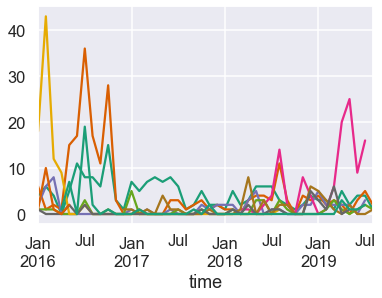

In [64]:
pres[pres['Top Attacked']=="Barack Obama"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="Hillary Clinton"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="Mitt Romney"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="Robert Mueller"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="John Brennan"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="Ted Cruz"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="James Comey"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="Michael Cohen"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="Bernie Sanders"].resample('M')['headline'].count().plot()
pres[pres['Top Attacked']=="Jeb Bush"].resample('M')['headline'].count().plot()

In [ ]:
obama['favorite_count'] = obama['favorite_count'].astype(int)
obama['retweet_count'] = obama['retweet_count'].astype(int)

In [ ]:
, #Countries, #Other